In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('music.csv')

df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
df.drop(['song'], axis=1, inplace=True)
df.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
le = LabelEncoder()
genres = df['genre'].values
df = df.apply(le.fit_transform)
df.head()

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,118,606,0,2,63,386,434,1,778,0,179,1017,242,640,706,360,30
1,828,62,0,1,65,85,497,0,988,1,227,353,0,739,517,1564,54
2,254,1356,0,1,52,168,114,7,89,1,38,911,0,547,146,1392,36
3,111,921,0,2,64,186,513,0,1280,0,207,479,224,633,383,903,53
4,0,394,0,2,51,249,528,8,1030,0,254,574,512,289,691,1736,30


In [37]:
samples = df.values

scaler = StandardScaler()
model = KMeans(n_clusters=60)

pipeline = make_pipeline(scaler, model)

pipeline.fit(samples)

labels = pipeline.predict(samples)


feature_importances = np.mean(model.cluster_centers_, axis=0)
print(feature_importances)

[-0.01269983  0.03586696 -0.01549943 -0.05153343  0.0132811  -0.00544686
 -0.01212059  0.02109542 -0.05274115 -0.04375074  0.00400452 -0.01859023
  0.08286813 -0.02428213 -0.0051927   0.00365922  0.00495721]


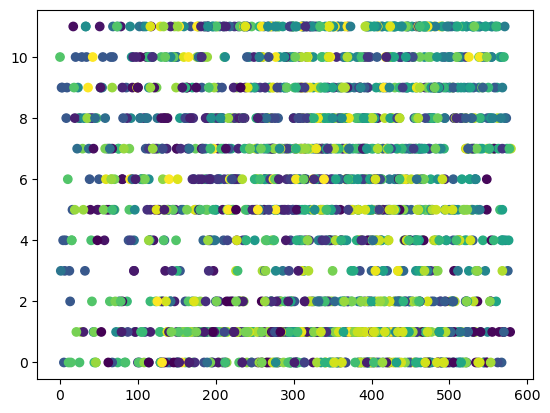

In [32]:

xs = samples[:, 6] # select the first column
ys = samples[:, 7] # select the second column
plt.scatter(xs, ys, c=labels)
plt.show()

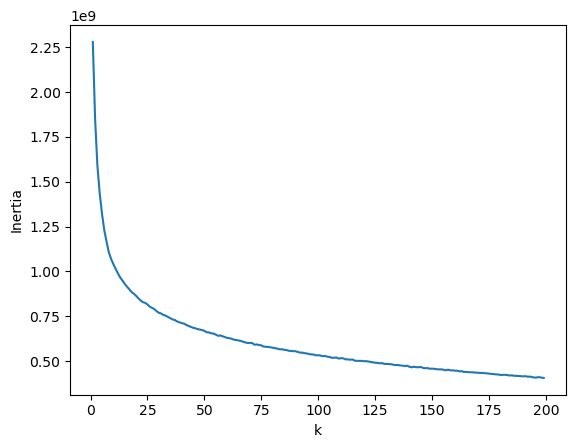

In [19]:
k_range = range(1, 100)

inertia = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertia.append(model.inertia_)
    
plt.plot(k_range, inertia)
plt.ylabel('Inertia')
plt.xlabel('k')
plt.show()

In [38]:
new_df = pd.DataFrame({'labels': labels, 'genres': genres})

ct = pd.crosstab(new_df['labels'], new_df['genres'])
ct.head(10)

genres,Dance/Electronic,"Folk/Acoustic, pop","Folk/Acoustic, rock","Folk/Acoustic, rock, pop",R&B,"World/Traditional, Folk/Acoustic","World/Traditional, hip hop","World/Traditional, pop","World/Traditional, pop, Folk/Acoustic","World/Traditional, rock",...,"rock, blues","rock, blues, latin","rock, classical","rock, easy listening","rock, metal","rock, pop","rock, pop, Dance/Electronic","rock, pop, metal","rock, pop, metal, Dance/Electronic",set()
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,2,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
